<a href="https://colab.research.google.com/github/YishaZukhrufin/MechineLearning/blob/main/Pertemuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Yisha Zukhrufin A**

**Kelas : TI-3A**

**Absen : 30**

**Nim : 2141720013**

Praktikum 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

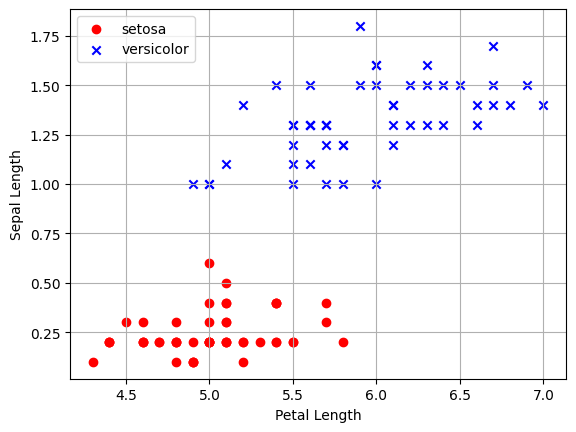

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

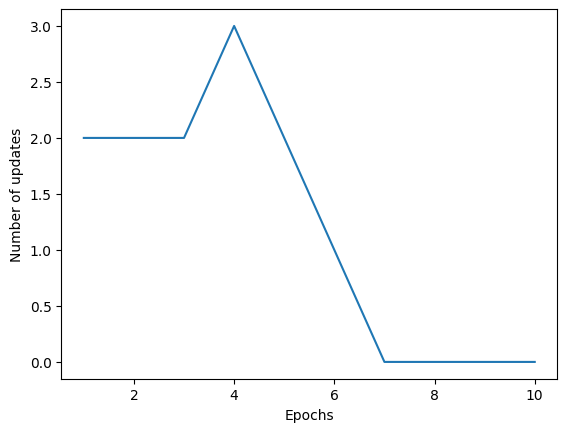

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

<ipython-input-14-324fb43e16bc>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


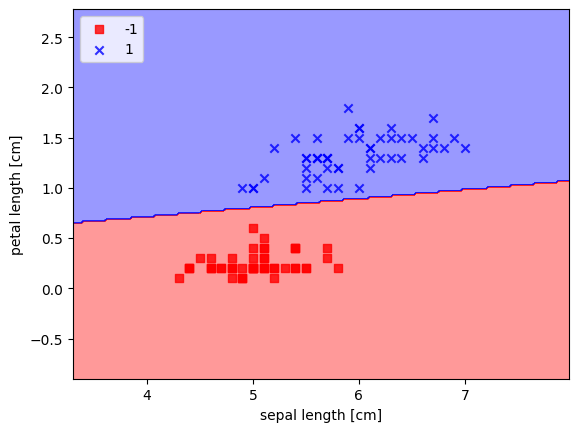

In [ ]:
# buat fungsi untuk plot decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

praktikum 2

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



praktikum 3

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Praktikum 4

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling (1).csv to Churn_Modelling (1).csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('Churn_Modelling (1).csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

membuat model NN

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training model

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6433 - accuracy: 0.6827
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.8024
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.8141
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4145 - accuracy: 0.8230
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8280
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8339
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3858 - accuracy: 0.8375
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8428
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3695 - accura

modelkan data baru dan buat prediksi

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 106ms/step
[[False]]


prediksi dengan data testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


cek akurasi dan confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 190  215]]


0.86

**TUGAS**

In [1]:
pip install --user tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
import numpy as np
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Muat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


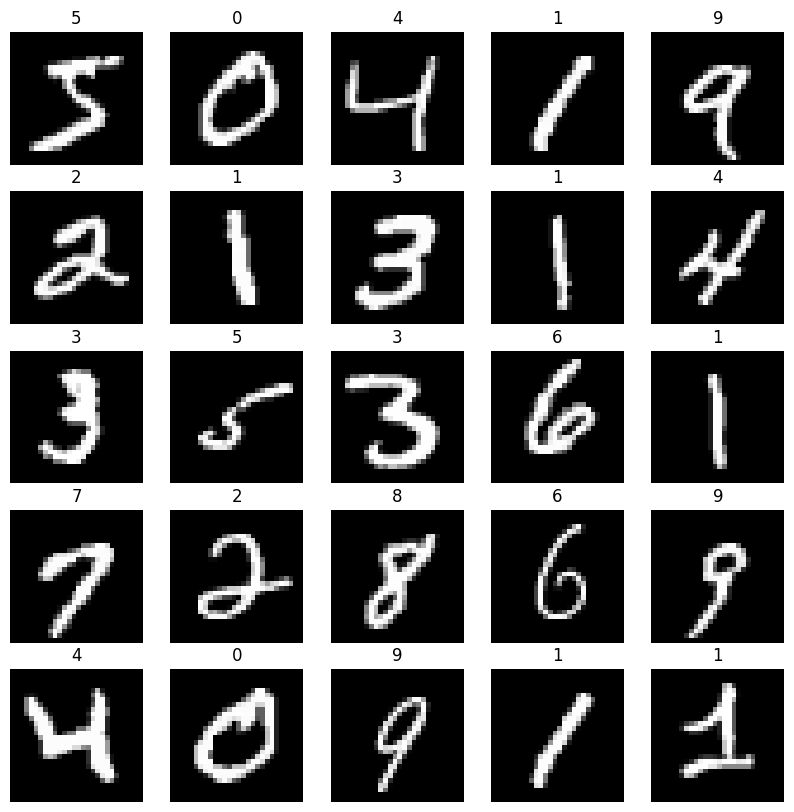

In [5]:
import matplotlib.pyplot as plt

# Tampilkan beberapa contoh gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [6]:
from sklearn.preprocessing import LabelBinarizer

# Contoh label kelas
labels = [2, 0, 1, 3, 2, 1, 0, 3]

# Membuat instance LabelBinarizer
label_binarizer = LabelBinarizer()

# Melakukan one-hot encoding pada label
one_hot_labels = label_binarizer.fit_transform(labels)

# Hasil one-hot encoding
print(one_hot_labels)


[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Contoh data kategorikal
data = {'Geography': ['France', 'Germany', 'Spain', 'France', 'Spain']}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat instance OneHotEncoder
encoder = OneHotEncoder()

# Melakukan One-Hot Encoding pada kolom "Geography"
encoded_data = encoder.fit_transform(df[['Geography']])

# Mengonversi hasil encoding ke DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Geography']))

# Hasil One-Hot Encoding
print(encoded_df)

   Geography_France  Geography_Germany  Geography_Spain
0               1.0                0.0              0.0
1               0.0                1.0              0.0
2               0.0                0.0              1.0
3               1.0                0.0              0.0
4               0.0                0.0              1.0


In [8]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (train) dan pengujian (test)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Jika Anda ingin melihat jumlah data yang telah dibagi:
print(f"Jumlah data pelatihan: {len(x_train)}")
print(f"Jumlah data validasi: {len(x_val)}")
print(f"Jumlah data pengujian: {len(x_test)}")

Jumlah data pelatihan: 48000
Jumlah data validasi: 12000
Jumlah data pengujian: 10000


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Contoh data numerik
data = [[2.0], [4.0], [1.0], [3.0]]

# Membuat instance MinMaxScaler
scaler = MinMaxScaler()

# Melakukan Min-Max Scaling pada data
scaled_data = scaler.fit_transform(data)

# Hasil dari scaling
print(scaled_data)

[[0.33333333]
 [1.        ]
 [0.        ]
 [0.66666667]]


arsitektur ann

In [12]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

ann = tf.keras.models.Sequential()
ann.add(Flatten(input_shape=(28, 28)))  # Flatten gambar 28x28 menjadi array 1D
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='softmax'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Pelatihan model
ann.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
750/750 [==============================] - 4s 3ms/step - loss: 0.4671 - accuracy: 0.0991 - val_loss: 0.3322 - val_accuracy: 0.1009
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.3261 - accuracy: 0.1088 - val_loss: 0.3249 - val_accuracy: 0.1135
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3249 - accuracy: 0.1129 - val_loss: 0.3249 - val_accuracy: 0.1135
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3249 - accuracy: 0.1129 - val_loss: 0.3249 - val_accuracy: 0.1135
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3249 - accuracy: 0.1129 - val_loss: 0.3249 - val_accuracy: 0.1135


In [13]:
# Buat prediksi pada data pengujian
predictions = ann.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [14]:
# Konversi prediksi ke label
predicted_labels = [prediction.argmax() for prediction in predictions]
actual_labels = [label.argmax() for label in y_test]

In [18]:
print(f"Prediksi: {predicted_labels}")
print(f"Label Sebenarnya: {actual_labels}")

Prediksi: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Hitung akurasi
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Buat confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Akurasi: 11.35%
Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]
